<a href="https://colab.research.google.com/github/LeDaijin/ThanhLe/blob/main/DibuzzleUsedCar_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries and data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# https://drive.google.com/file/d/12i1coGh_Z_n6lCvy99JF574VmB_N6nNo/view?usp=sharing

df = pd.read_csv('https://drive.google.com/uc?export=download&id=12i1coGh_Z_n6lCvy99JF574VmB_N6nNo')


In [4]:
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000.0,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000.0,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000.0,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,5/5/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000.0,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000.0,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [5]:
df[df.duplicated()].sort_values(["price_in_aed","kilometers"]).head(5)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
8485,"Mitsubishi pajero available, good condition",12000.0,240000,Perfect inside and out,Perfect inside and out,Owner,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2005.0,Gold,Dubai,GLS,mitsubishi,pajero,12/5/2022
8357,Inspected Car | 2006 Nissan Murano 3.5L | GCC ...,13000.0,194465,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2006.0,Silver,Abu Dhabi,Other,nissan,murano,21/04/2022
5768,Fiesta lady driven,13800.0,160000,Perfect inside and out,Perfect inside and out,Owner,Hatchback,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2009.0,Black,Dubai,Other,ford,fiesta,27/04/2022
9595,ford escape 2009 GCC,14000.0,223000,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2009.0,Red,Sharjah,Other,ford,escape,30/04/2022
6159,"Toyota RAV4 in very good condition, model 2000...",14500.0,176000,Perfect inside and out,Perfect inside and out,Dealer,SUV,4,Automatic Transmission,North American Specs,200 - 300 HP,Gasoline,Left Hand Side,2000.0,Gold,Sharjah,EX,toyota,rav-4,13/05/2022


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   float64
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

In [7]:
df['emirate'] = df['emirate'].str.replace(" ", "")

In [8]:
df['no_of_cylinders'] = df['no_of_cylinders'].replace('Unknown', np.nan)
df["horsepower"] = df["horsepower"].replace("Unknown", np.nan)

In [9]:
df.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders         138
transmission_type         0
regional_specs            0
horsepower              814
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

* Xử lí duplicated

In [10]:
df.duplicated().sum()

282

In [11]:
df = df.drop_duplicates()

* Kiểm tra và xử lí outlier

<Axes: ylabel='no_of_cylinders'>

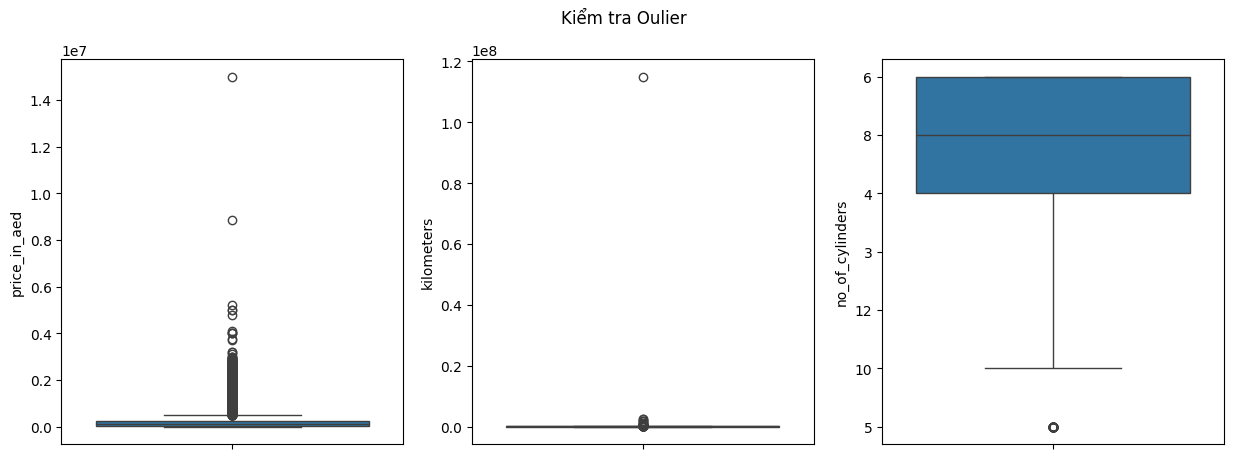

In [12]:
plt.figure(figsize= (15, 5))
plt.suptitle("Kiểm tra Oulier")
plt.subplot(1, 3, 1)
sns.boxplot(df["price_in_aed"])
plt.subplot(1, 3, 2)
sns.boxplot(df["kilometers"])
plt.subplot(1, 3, 3)
sns.boxplot(df["no_of_cylinders"])

* Để thuận tiện cho việc EDA và train model, bỏ đi giá trị outlier quá xa với data trong Price và Kilometers

In [13]:
df = df.drop(df[df["price_in_aed"] > 0.8*1e7].index)
df = df.drop(df[df["kilometers"] > 1*1e8].index)

**EDA**

* Uni Variable

<Axes: xlabel='price_in_aed'>

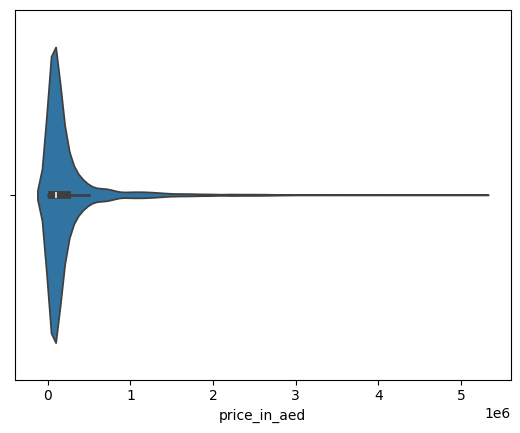

In [14]:
sns.violinplot(data= df, x= "price_in_aed")

<Axes: xlabel='kilometers', ylabel='Density'>

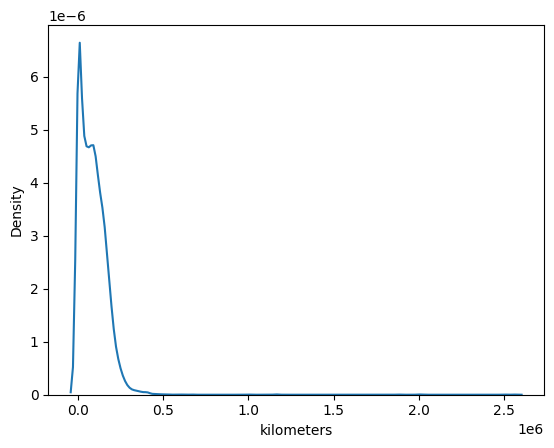

In [15]:
sns.kdeplot(df["kilometers"])

In [16]:
df["body_condition"].value_counts()

body_condition
Perfect inside and out                9346
No accidents, very few faults          196
A bit of wear & tear, all repaired     113
Normal wear & tear, a few issues        30
Name: count, dtype: int64

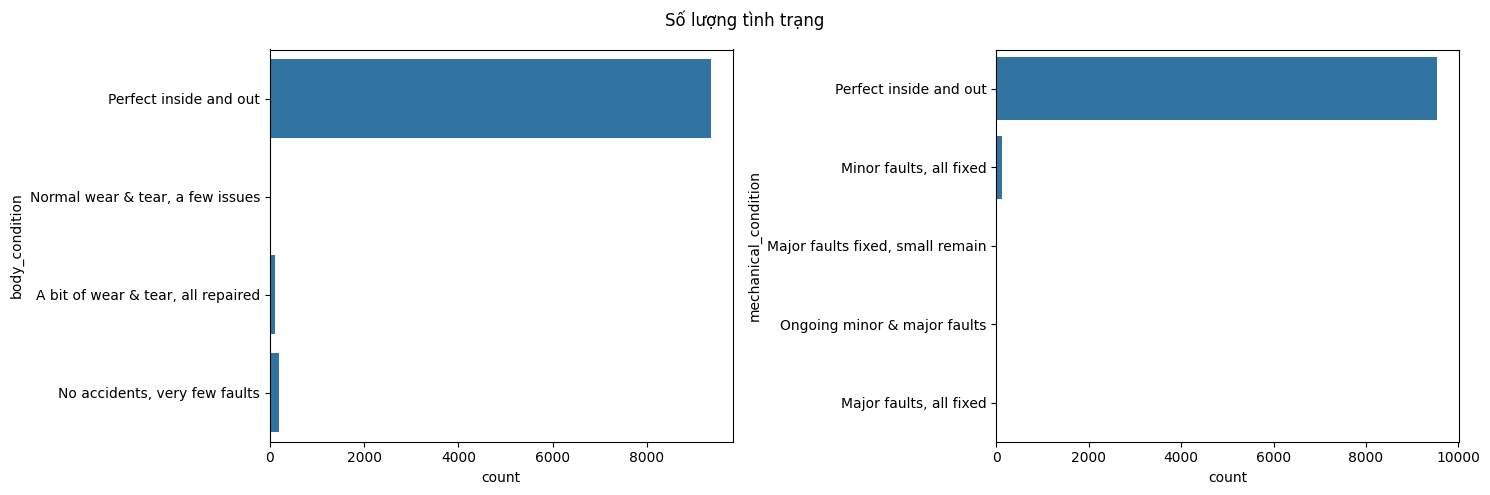

In [17]:
plt.figure(figsize= (15, 5))
plt.suptitle("Số lượng tình trạng")
plt.subplot(1, 2, 1)
sns.countplot(data= df, y="body_condition")
plt.subplot(1, 2, 2)
sns.countplot(data= df, y="mechanical_condition")
plt.tight_layout()

Text(0.5, 1.0, 'Số lượng dealer bán xe')

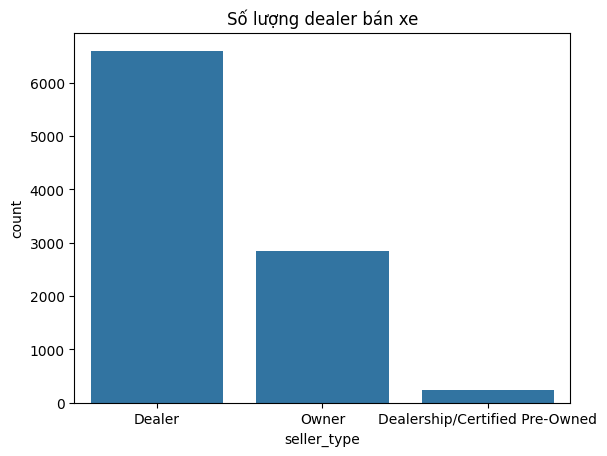

In [18]:
sns.countplot(data= df, x= "seller_type")
plt.title("Số lượng dealer bán xe")

Text(0.5, 1.0, 'Số lượng kiểu xe')

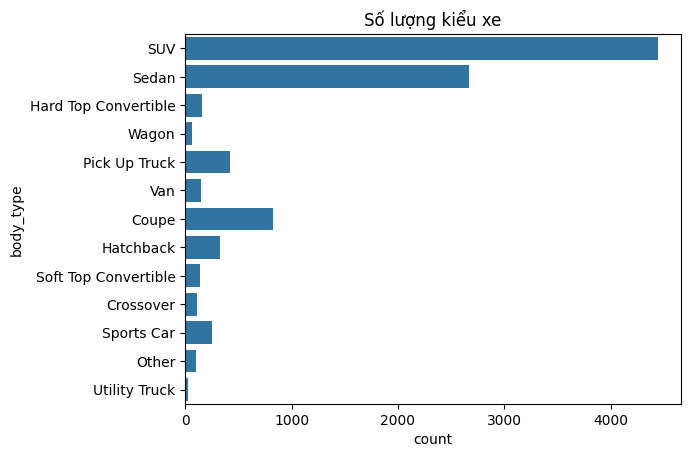

In [19]:
sns.countplot(df["body_type"])
plt.title("Số lượng kiểu xe")

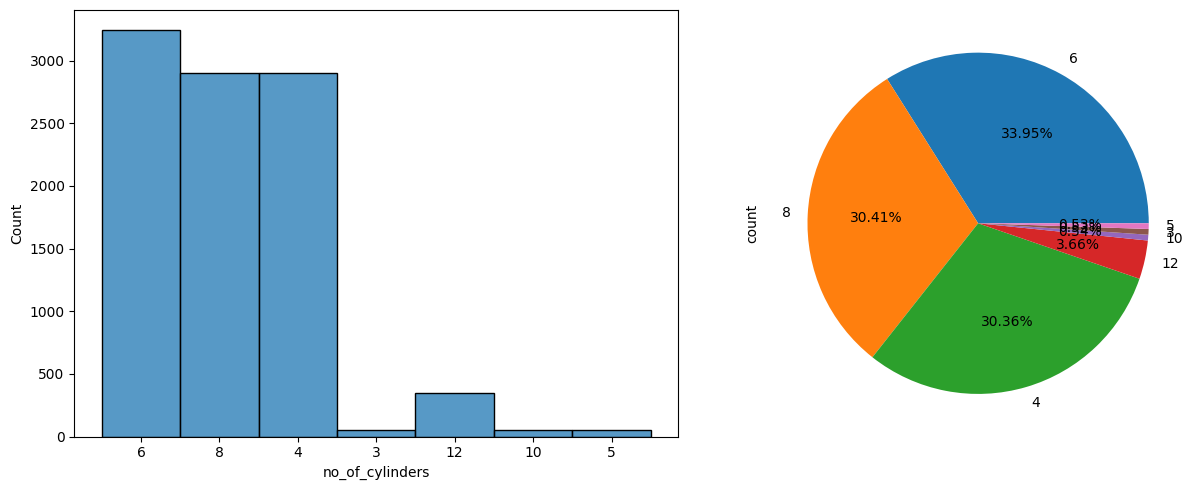

In [20]:
plt.figure(figsize= (13, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["no_of_cylinders"])
plt.subplot(1, 2, 2)
df["no_of_cylinders"].value_counts().plot.pie(autopct= "%.2f%%")
plt.tight_layout()

<Axes: title={'center': 'Số lượng về thông số mã lực của xe'}, xlabel='count', ylabel='horsepower'>

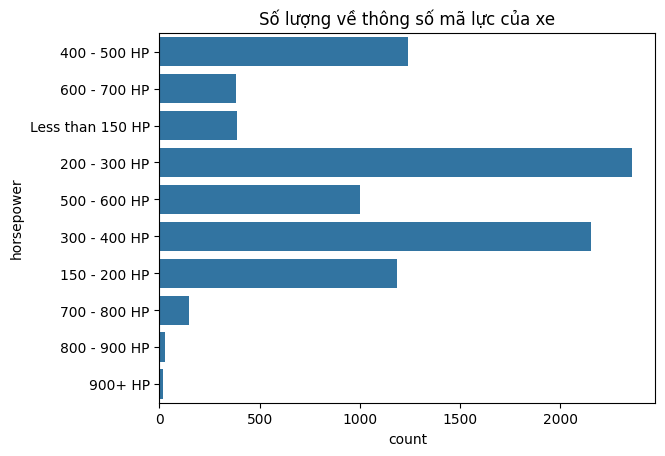

In [21]:
plt.title("Số lượng về thông số mã lực của xe")
sns.countplot(df["horsepower"])

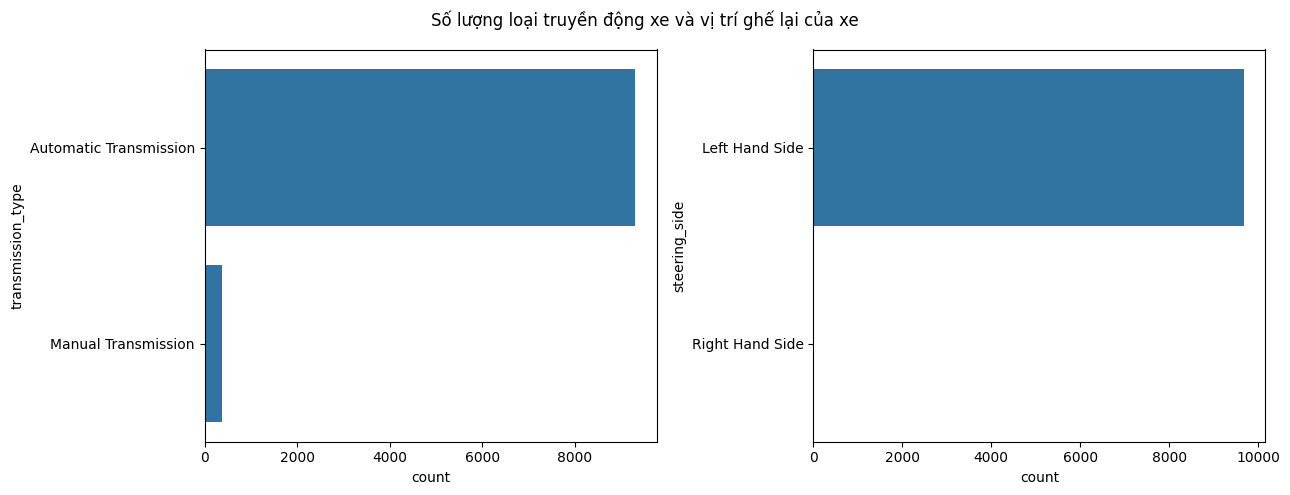

In [22]:
plt.figure(figsize= (13, 5))
plt.suptitle("Số lượng loại truyền động xe và vị trí ghế lại của xe")
plt.subplot(1, 2, 1)
sns.countplot(df["transmission_type"])
plt.subplot(1, 2, 2)
sns.countplot(df["steering_side"])
plt.tight_layout()

Text(0.5, 1.0, 'Xuất sứ của xe')

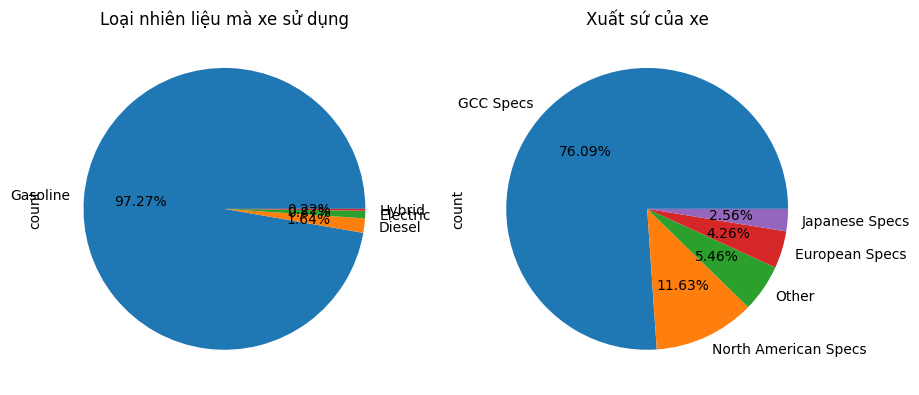

In [23]:
plt.figure(figsize= (10, 5))
plt.subplot(1, 2, 1)
df["fuel_type"].value_counts().plot.pie(autopct= "%.2f%%")
plt.title("Loại nhiên liệu mà xe sử dụng")
plt.subplot(1, 2, 2)
df["regional_specs"].value_counts().plot.pie(autopct= "%.2f%%")
plt.title("Xuất sứ của xe")


<ipython-input-24-270f29f0ec46>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= df, x="emirate", palette= "bright")


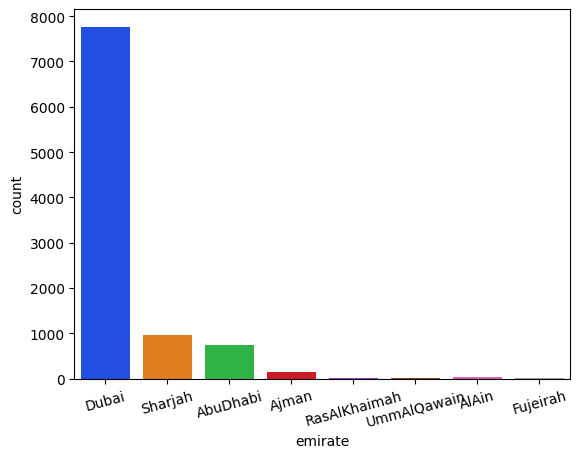

In [24]:
ax = sns.countplot(data= df, x="emirate", palette= "bright")
ax.tick_params(axis='x', labelrotation=15)

* Bi Variable

In [25]:
df.head(1)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000.0,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,NaN,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022


<Axes: xlabel='price_in_aed', ylabel='kilometers'>

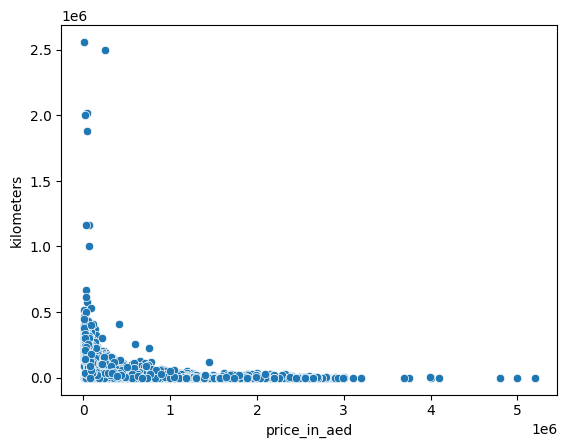

In [26]:
sns.scatterplot(data= df, x= "price_in_aed", y= "kilometers")

<ipython-input-27-57f7401c5e92>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= df, x= "body_condition", y="price_in_aed", palette="bright")
<ipython-input-27-57f7401c5e92>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= df, x= "mechanical_condition", y="price_in_aed", palette="bright")


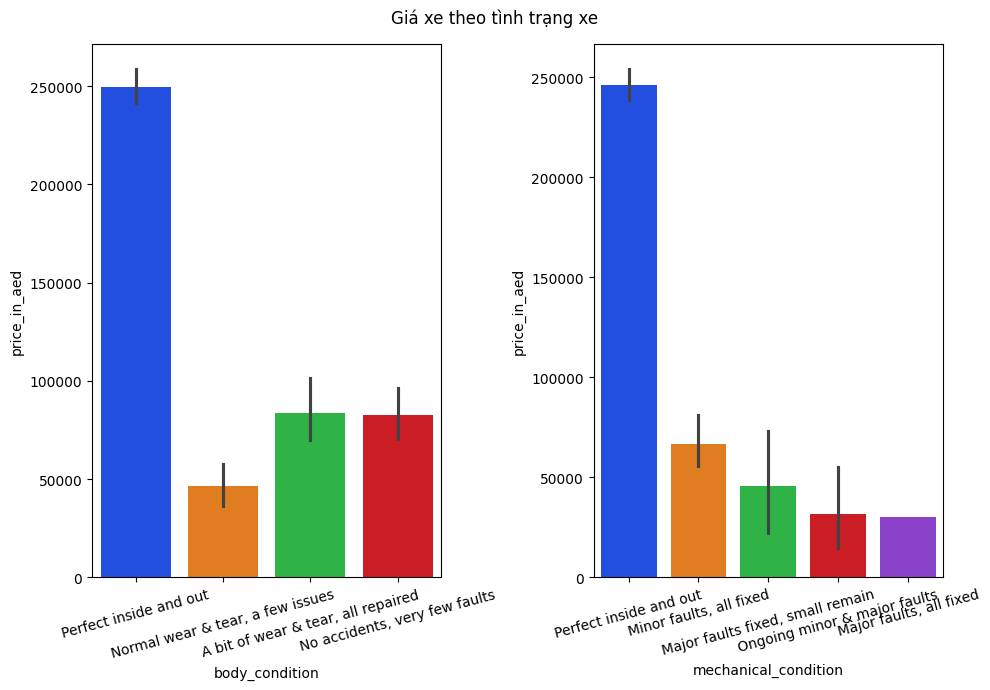

In [27]:
plt.figure(figsize= (10, 7))
plt.suptitle("Giá xe theo tình trạng xe")
plt.subplot(1, 2, 1)
ax = sns.barplot(data= df, x= "body_condition", y="price_in_aed", palette="bright")
ax.tick_params(axis='x', labelrotation=15)
plt.subplot(1, 2, 2)
ax = sns.barplot(data= df, x= "mechanical_condition", y="price_in_aed", palette="bright")
ax.tick_params(axis='x', labelrotation=15)
plt.tight_layout()

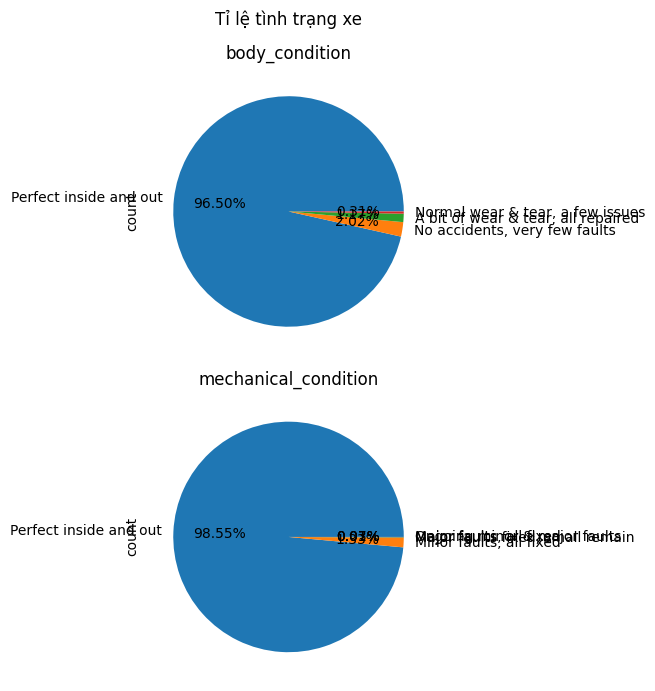

In [28]:
plt.figure(figsize= (10, 7))
plt.suptitle("Tỉ lệ tình trạng xe")
plt.subplot(2, 1, 1)
df["body_condition"].value_counts().plot.pie(autopct= "%.2f%%")
plt.title("body_condition")
plt.subplot(2, 1, 2)
df["mechanical_condition"].value_counts().plot.pie(autopct= "%.2f%%")
plt.title("mechanical_condition")
plt.tight_layout()

<ipython-input-29-c3e1bd8b4e34>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= "seller_type", y= "price_in_aed", palette="bright")


<Axes: xlabel='seller_type', ylabel='price_in_aed'>

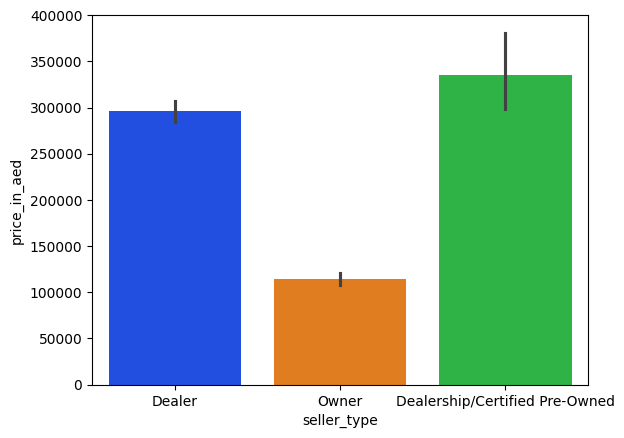

In [29]:
sns.barplot(data= df, x= "seller_type", y= "price_in_aed", palette="bright")

<ipython-input-30-ccd27fe1ca22>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= "price_in_aed", y= "body_type", palette="bright")


<Axes: xlabel='price_in_aed', ylabel='body_type'>

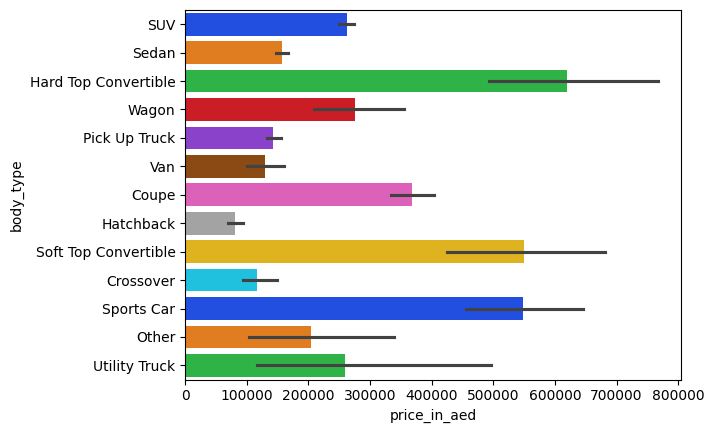

In [30]:
sns.barplot(data= df, x= "price_in_aed", y= "body_type", palette="bright")

<Axes: xlabel='no_of_cylinders', ylabel='Count'>

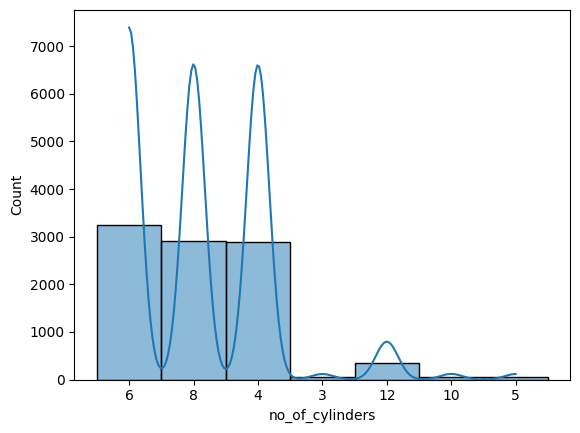

In [31]:
sns.histplot(data= df, x= "no_of_cylinders", kde= "price_in_aed")

<ipython-input-32-1ee23b93f177>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, y= "price_in_aed", x= "transmission_type", palette="bright")
<ipython-input-32-1ee23b93f177>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, y= "price_in_aed", x= "steering_side", palette="bright")


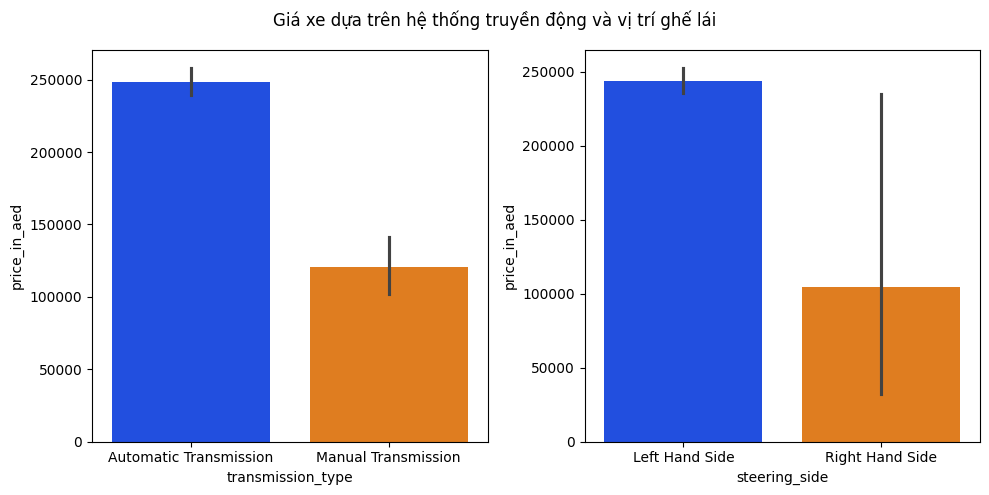

In [32]:
plt.figure(figsize= (10, 5))
plt.suptitle("Giá xe dựa trên hệ thống truyền động và vị trí ghế lái")
plt.subplot(1, 2, 1)
sns.barplot(data= df, y= "price_in_aed", x= "transmission_type", palette="bright")
plt.subplot(1, 2, 2)
sns.barplot(data= df, y= "price_in_aed", x= "steering_side", palette="bright")
plt.tight_layout()

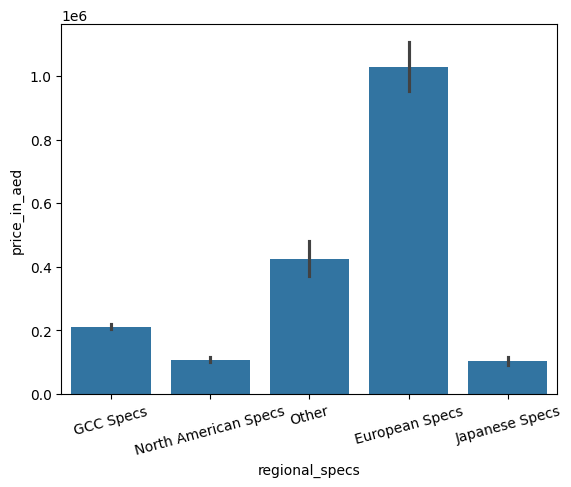

In [33]:
ax = sns.barplot(data= df, y= "price_in_aed", x= "regional_specs")
ax.tick_params(axis='x', labelrotation=15)

In [34]:
spec = df[df["regional_specs"] == "European Specs"]
spec["body_type"].value_counts()

body_type
SUV                     197
Sedan                    73
Coupe                    49
Hard Top Convertible     23
Sports Car               21
Soft Top Convertible     20
Other                    15
Pick Up Truck             4
Hatchback                 4
Van                       3
Wagon                     2
Crossover                 2
Name: count, dtype: int64

<ipython-input-35-09824d63af47>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data= df, x= "horsepower", kde= "price_in_aed", palette="bright")


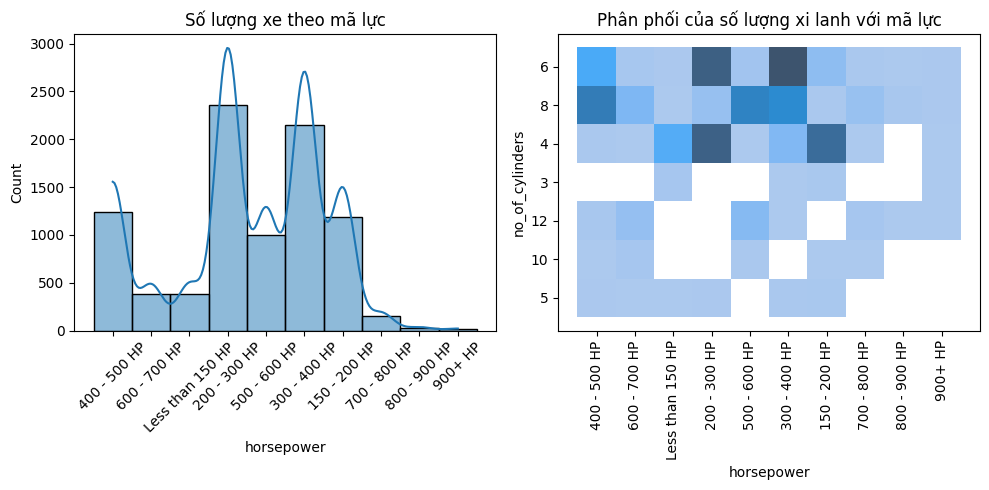

In [35]:
plt.figure(figsize= (10, 5))
plt.subplot(1, 2, 1)
plt.title("Số lượng xe theo mã lực")
ax = sns.histplot(data= df, x= "horsepower", kde= "price_in_aed", palette="bright")
ax.tick_params(axis='x', labelrotation=45)
plt.subplot(1, 2, 2)
plt.title("Phân phối của số lượng xi lanh với mã lực")
ax = sns.histplot(data= df, x= "horsepower", y= "no_of_cylinders")
ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()

=> Xe có mã lực càng cao thì giá xe càng cao

<ipython-input-36-111f25389fe0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= "fuel_type", y="price_in_aed", palette="bright")


<Axes: xlabel='fuel_type', ylabel='price_in_aed'>

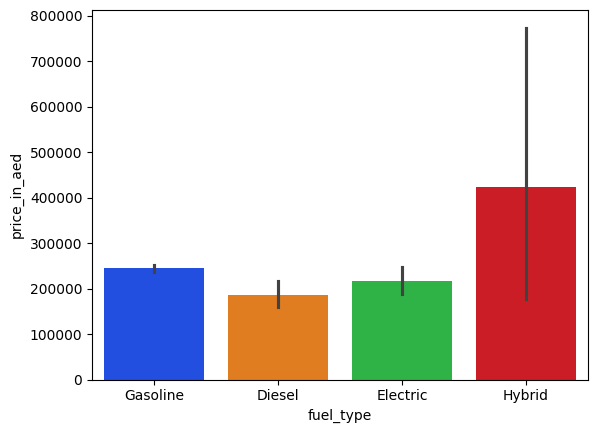

In [36]:
sns.barplot(data= df, x= "fuel_type", y="price_in_aed", palette="bright")

<Axes: xlabel='year', ylabel='price_in_aed'>

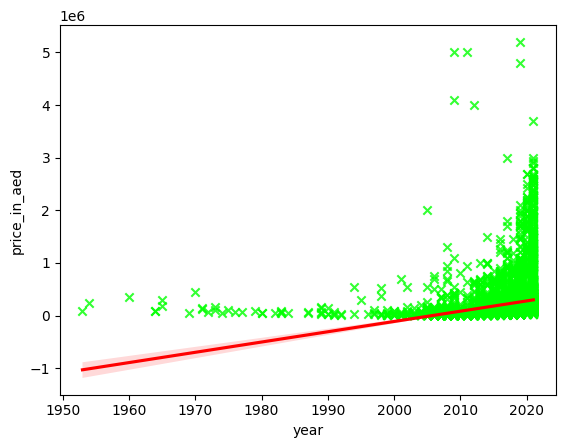

In [37]:
sns.regplot(data=df, x= "year", y= "price_in_aed", marker= "x", color= "Lime", line_kws={"color": "red"})

=> Bắt đầu từ khoảng năm 2000 bán được nhiều xe và giá cao hơn

In [38]:
filter_company = df[df['price_in_aed'] > 0.7*1e6]

<Axes: xlabel='price_in_aed', ylabel='company'>

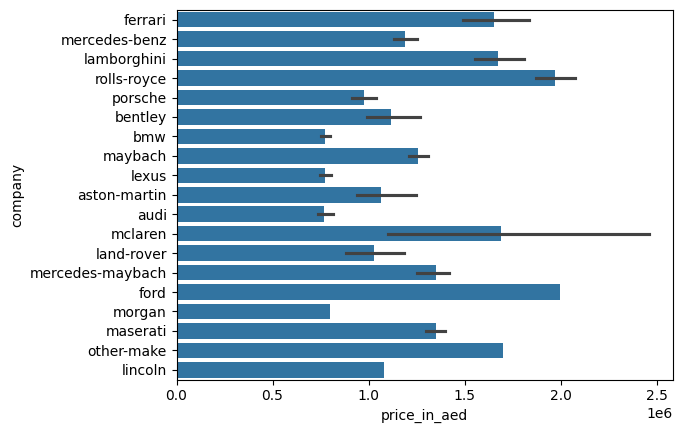

In [39]:
sns.barplot(data= filter_company, y= "company", x= "price_in_aed")

<ipython-input-40-bd70de9428e4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="emirate", x= "price_in_aed", palette="bright")


<Axes: xlabel='price_in_aed', ylabel='emirate'>

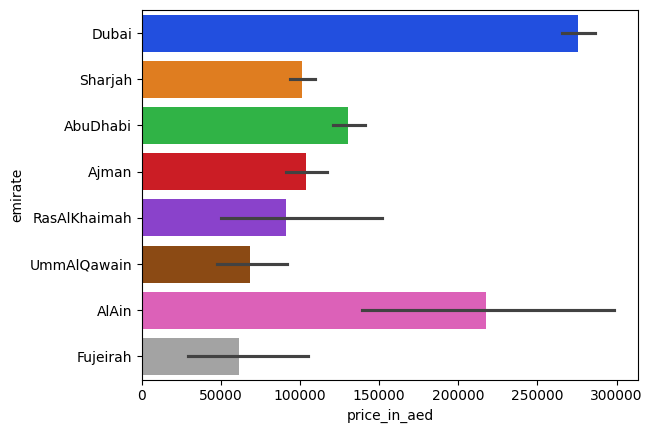

In [40]:
sns.barplot(data=df, y="emirate", x= "price_in_aed", palette="bright")

<Axes: xlabel='price_in_aed', ylabel='color'>

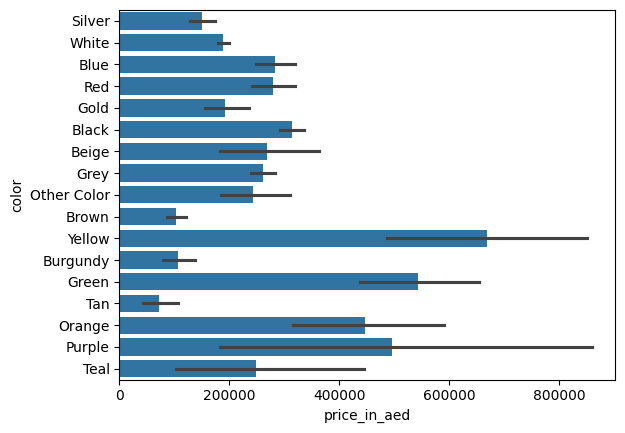

In [41]:
sns.barplot(data= df, x= "price_in_aed", y= "color")

* Trend về xe từ năm 2010 trở đi

<Axes: xlabel='year', ylabel='price_in_aed'>

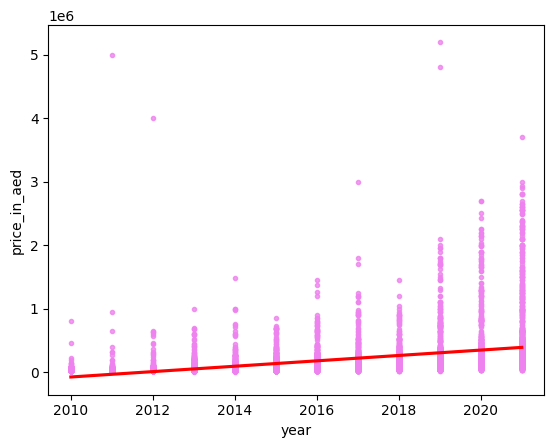

In [42]:
year_after_2010 = df[df["year"] >= 2010]
sns.regplot(data= year_after_2010, x= "year", y="price_in_aed", marker= ".", color= "violet", line_kws={"color": "red"})

Text(0.5, 1.0, 'Số lượng xe bán được trong năm 2010 đến 2020')

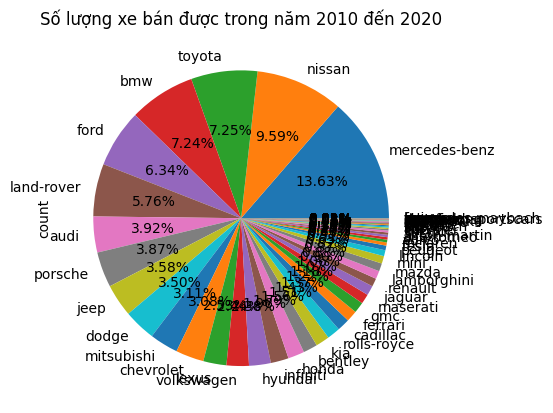

In [43]:
year_after_2010["company"].value_counts().plot.pie(autopct= "%.2f%%")
plt.title("Số lượng xe bán được trong năm 2010 đến 2020")

* Xử lý Null

In [44]:
df["horsepower"] = df["horsepower"].map({
    'Less than 150 HP': 0,
    '150 - 200 HP': 1,
    '200 - 300 HP': 2,
    '300 - 400 HP': 3,
    '400 - 500 HP': 4,
    '500 - 600 HP': 5,
    '600 - 700 HP': 6,
    '700 - 800 HP': 7,
    '800 - 900 HP': 8,
    '900+ HP': 9
})

In [45]:
df["no_of_cylinders"] = df["no_of_cylinders"].fillna(df["no_of_cylinders"].median())
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())
# df = df.dropna(subset=['no_of_cylinders'])
# df = df.dropna(subset=['horsepower'])

In [46]:
df['year'].fillna(df['year'].mode()[0], inplace=True)

In [47]:
df.isna().sum()

title                    4
price_in_aed             0
kilometers               0
body_condition           0
mechanical_condition     0
seller_type              0
body_type                0
no_of_cylinders          0
transmission_type        0
regional_specs           0
horsepower               0
fuel_type                0
steering_side            0
year                     0
color                    0
emirate                  0
motors_trim             28
company                  0
model                    0
date_posted              0
dtype: int64

* Xử lý kiểu dữ liệu

In [48]:
df["year"] = df["year"].astype(int)
df["price_in_aed"] = df["price_in_aed"].astype(int)
df["no_of_cylinders"] = df["no_of_cylinders"].astype(int)

**Trainning Data**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Classification
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from collections import Counter

In [50]:
df.head(1)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,3.0,Gasoline,Left Hand Side,2013,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022


In [51]:
df = df.drop(columns= "title")
df = df.drop(columns= "date_posted")
df = df.drop(columns= "color")
df = df.drop(columns= "motors_trim")
df = df.drop(columns= "model")
df = df.drop(columns= "company")
df = df.drop(columns= "body_condition")
df = df.drop(columns= "mechanical_condition")
df = df.drop(columns= "steering_side")
df = df.drop(columns= "emirate")
# df = df.drop(columns= "transmission_type")

* Mã hoá dữ liệu

In [52]:
df["body_type"] = df["body_type"].map({
    'SUV': 0,
    'Sedan': 1,
    'Hard Top Convertible': 2,
    'Wagon': 3,
    'Pick Up Truck': 4,
    'Van': 5,
    'Coupe': 6,
    'Hatchback': 7,
    'Soft Top Convertible': 8,
    'Crossover': 9,
    'Sports Car': 10,
    'Other': 11,
    'Utility Truck': 12
})

In [53]:
# df["body_condition"] = df["body_condition"].map({
#     'Perfect inside and out': 0,
#     'Normal wear & tear, a few issues': 1,
#     'A bit of wear & tear, all repaired': 2,
#     'No accidents, very few faults': 3
# })

In [54]:
# df["mechanical_condition"] = df["mechanical_condition"].map({
#     'Perfect inside and out': 0,
#     'Minor faults, all fixed': 1,
#     'Major faults fixed, small remain': 2,
#     'Ongoing minor & major faults': 3,
#     'Major faults, all fixed': 4
# })

In [55]:
df["seller_type"] = df["seller_type"].map({
    'Dealer': 0,
    'Owner': 1,
    'Dealership/Certified Pre-Owned': 2
})

In [56]:
df["transmission_type"] = df["transmission_type"].map({
    'Automatic Transmission': 0,
    'Manual Transmission': 1
})

In [57]:
df["regional_specs"] = df["regional_specs"].map({
    'North American Specs': 0,
    'GCC Specs': 1,
    'European Specs': 2,
    'Japanese Specs': 3,
    'Other': 4
})

In [58]:
df["fuel_type"] = df["fuel_type"].map({
    'Hybrid': 0,
    'Gasoline': 1,
    'Diesel': 2,
    'Electric': 3
})

In [59]:
# df["steering_side"] = df["steering_side"].map({
#     'Left Hand Side': 0,
#     'Right Hand Side': 1
# })

In [60]:
# df["emirate"] = df["emirate"].map({
#     'Sharjah': 0,
#     'Dubai': 1,
#     'AbuDhabi': 2,
#     'Ajman': 3,
#     'RasAlKhaimah': 4,
#     'UmmAlQawain': 5,
#     'AlAin': 6,
#     'Fujeirah': 7,
# })

In [61]:
df.head()

,price_in_aed,kilometers,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,year
0,26000,167390,0,0,6,0,1,3.0,1,2013
1,110000,39000,0,0,8,0,0,4.0,1,2018
2,78000,200000,0,1,6,0,1,4.0,1,2014
3,899000,27000,0,2,8,0,1,6.0,1,2018
4,33000,69000,1,3,4,1,1,0.0,1,2020


In [62]:
df.select_dtypes(['int', "float"]).corr().style.background_gradient()

,price_in_aed,kilometers,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,year
price_in_aed,1.000000,-0.349631,-0.154449,0.068812,0.502244,-0.059099,0.200858,0.573126,-0.019033,0.221120
kilometers,-0.349631,1.000000,0.115975,-0.065792,-0.087253,0.031201,-0.104224,-0.192604,-0.090696,-0.405762
seller_type,-0.154449,0.115975,1.000000,0.018075,-0.131594,-0.019663,-0.112743,-0.092035,-0.053351,-0.106923
body_type,0.068812,-0.065792,0.018075,1.000000,-0.015603,0.151979,0.039958,0.066855,0.064395,-0.001938
no_of_cylinders,0.502244,-0.087253,-0.131594,-0.015603,1.000000,-0.119658,0.111202,0.724329,-0.052364,-0.086347
transmission_type,-0.059099,0.031201,-0.019663,0.151979,-0.119658,1.000000,0.045570,-0.093400,0.113587,-0.062163
regional_specs,0.200858,-0.104224,-0.112743,0.039958,0.111202,0.045570,1.000000,0.116555,0.145435,-0.033044
horsepower,0.573126,-0.192604,-0.092035,0.066855,0.724329,-0.093400,0.116555,1.000000,-0.046501,0.056031
fuel_type,-0.019033,-0.090696,-0.053351,0.064395,-0.052364,0.113587,0.145435,-0.046501,1.000000,0.059917
year,0.221120,-0.405762,-0.106923,-0.001938,-0.086347,-0.062163,-0.033044,0.056031,0.059917,1.000000


In [63]:
X= df.drop(columns= ("price_in_aed"))
y= df[("price_in_aed")]

X_train, X_test, y_train, y_test= train_test_split( X, y, test_size= 0.2, random_state=0)

In [64]:
# preprocessor = ColumnTransformer([

# preprocessor.fit_transform(X)

In [65]:
def trainning_eval (model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scaler = StandardScaler()
  df['kilometers'] = scaler.fit_transform(df[['kilometers']])
  df['price_in_aed'] = scaler.fit_transform(df[['price_in_aed']])

  MAE = metrics.mean_absolute_error(y_pred, y_test)
  MSE = metrics.mean_squared_error(y_pred, y_test)
  R2 = metrics.r2_score(y_pred, y_test)

  print(f"MODEL: {model}")
  print(f"Mean Absolute Error: {MAE:.2f}")
  print(f"Mean Square Error: {MSE:.2f}")
  print(f"R2 score: {R2:.2f}")

In [66]:
trainning_eval (LinearRegression())

MODEL: LinearRegression()
Mean Absolute Error: 192976.86
Mean Square Error: 96842847579.80
R2 score: -0.21


In [67]:
trainning_eval (SVR(C= 15, kernel= "rbf"))

MODEL: SVR(C=15)
Mean Absolute Error: 194872.71
Mean Square Error: 196588362149.98
R2 score: -1216.45


In [68]:
trainning_eval (DecisionTreeRegressor(max_depth= 5))

MODEL: DecisionTreeRegressor(max_depth=5)
Mean Absolute Error: 101374.31
Mean Square Error: 43752460513.79
R2 score: 0.69


In [69]:
trainning_eval (RandomForestRegressor(n_estimators= 100, max_depth= 10))

MODEL: RandomForestRegressor(max_depth=10)
Mean Absolute Error: 77234.83
Mean Square Error: 31435078411.34
R2 score: 0.80


In [70]:
trainning_eval (AdaBoostRegressor(n_estimators= 100, random_state= 0))

MODEL: AdaBoostRegressor(n_estimators=100, random_state=0)
Mean Absolute Error: 129989.80
Mean Square Error: 55288851438.71
R2 score: 0.66


In [71]:
trainning_eval (ExtraTreesRegressor())

MODEL: ExtraTreesRegressor()
Mean Absolute Error: 79684.33
Mean Square Error: 33408087608.30
R2 score: 0.81


In [72]:
trainning_eval (GradientBoostingRegressor(n_estimators= 100, max_depth= 7))

MODEL: GradientBoostingRegressor(max_depth=7)
Mean Absolute Error: 76404.17
Mean Square Error: 37573888517.65
R2 score: 0.79


In [73]:
trainning_eval (XGBRegressor())

MODEL: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error: 78394.44
Mean Square Error: 34606275952.90
R2 score: 0.81
